In [12]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [78]:
f = uproot.open("output_ggHH_SM_minMassDist.root")['bbbbTree']
branches = f.keys()
print(branches)
df = f.arrays(branches,library="pd")
nEvents = len(df)

['run', 'luminosityBlock', 'event', 'xs', 'btag_SF', 'btag_SF_bup', 'btag_SF_bdown', 'btag_SF_cup', 'btag_SF_cdown', 'btag_SF_lightup', 'btag_SF_lightdown', 'norm_weight', 'trigger_SF', 'n_btag', 'allJets_truMatch', 'truMatch_H1_pt', 'truMatch_H1_pt_breg', 'truMatch_H1_eta', 'truMatch_H1_phi', 'truMatch_H1_m', 'truMatch_H1_m_breg', 'truMatch_H2_pt', 'truMatch_H2_pt_breg', 'truMatch_H2_eta', 'truMatch_H2_phi', 'truMatch_H2_m', 'truMatch_H2_m_breg', 'truMatch_HH_pt', 'truMatch_HH_pt_breg', 'truMatch_HH_eta', 'truMatch_HH_phi', 'truMatch_HH_m', 'truMatch_HH_m_breg', 'H1_pt', 'H1_eta', 'H1_phi', 'H1_m', 'H2_pt', 'H2_eta', 'H2_phi', 'H2_m', 'HH_pt', 'HH_eta', 'HH_phi', 'HH_m', 'H1H2_deltaEta', 'H1H2_deltaPhi', 'H1_costhetaCM', 'H1_b1_pt', 'H1_b1_eta', 'H1_b1_phi', 'H1_b1_m', 'H1_b2_pt', 'H1_b2_eta', 'H1_b2_phi', 'H1_b2_m', 'H2_b1_pt', 'H2_b1_eta', 'H2_b1_phi', 'H2_b1_m', 'H2_b2_pt', 'H2_b2_eta', 'H2_b2_phi', 'H2_b2_m', 'rndm_1', 'rndm_2', 'rndm_3', 'gen_H1_m', 'gen_H1_pt', 'gen_H1_eta', 'ge

no breg:
-4.4040956
-11.364475
with breg:
1.6781921
-2.8882883


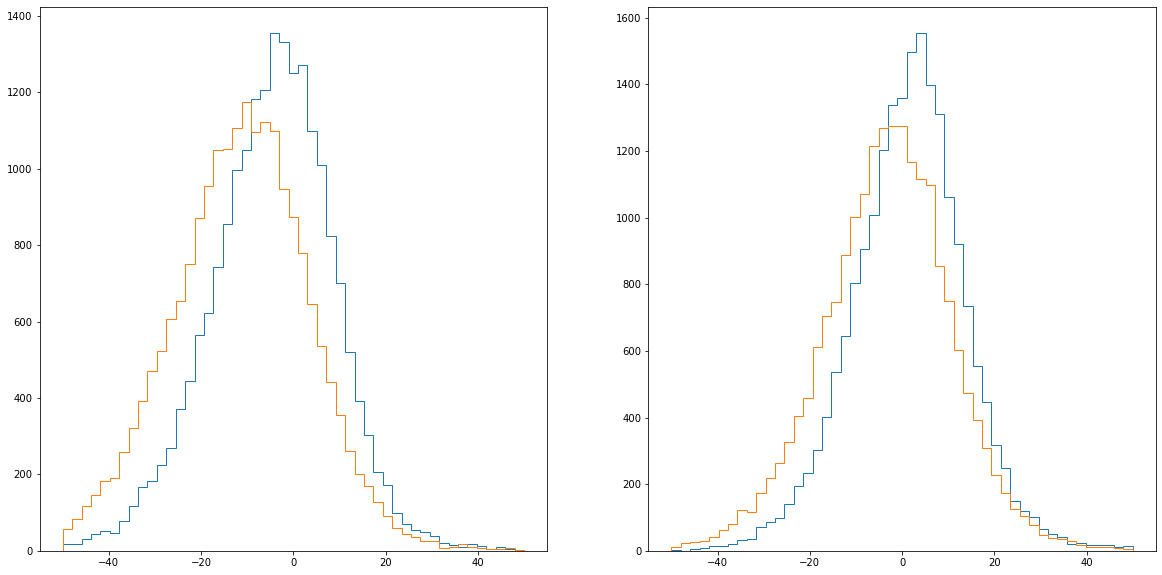

In [81]:
tru = df["allJets_truMatch"] == True

h1_m_truMatch = df[tru]["truMatch_H1_m"].values
h2_m_truMatch = df[tru]["truMatch_H2_m"].values
h1_m_truMatch_breg = df[tru]["truMatch_H1_m_breg"].values
h2_m_truMatch_breg = df[tru]["truMatch_H2_m_breg"].values
h1_m_gen = df[tru]["gen_H1_m"].values
h2_m_gen = df[tru]["gen_H2_m"].values

dm1 = h1_m_truMatch - h1_m_gen
dm2 = h2_m_truMatch - h2_m_gen
dm1_breg = h1_m_truMatch_breg - h1_m_gen
dm2_breg = h2_m_truMatch_breg - h2_m_gen

plt.figure(1,(20,10))
plt.subplot(121)
h1 = plt.hist(dm1,bins=np.linspace(-50,50),histtype='step')
h2 = plt.hist(dm2,bins=np.linspace(-50,50),histtype='step')
plt.subplot(122)
h3 = plt.hist(dm1_breg,bins=np.linspace(-50,50),histtype='step')
h4 = plt.hist(dm2_breg,bins=np.linspace(-50,50),histtype='step')

print("no breg:")
print(dm1.mean())
print(dm2.mean())
print("with breg:")
print(dm1_breg.mean())
print(dm2_breg.mean())

In [84]:
print("means with b-reg")
print(h1_m_truMatch_breg.mean())
print(h2_m_truMatch_breg.mean())
print("medians with b-reg")
print(np.median(h1_m_truMatch_breg))
print(np.median(h2_m_truMatch_breg))

means with b-reg
126.678185
122.11171
medians with b-reg
126.86606
122.2408


In [65]:
len(h1_m_truMatch)

20198

In [71]:
16785/20198

0.8310228735518368